## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import re

# extracted and modified code from https://www.youtube.com/watch?v=cxLht5KN3pQ

# reach out to website which has a table of data of interest
url = 'http://www.worldometers.info/coronavirus/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

# extract the html from the webpage
req = requests.get(url, headers=header).text

# format the html
req = re.sub(r'<.*?>', lambda g: g.group(0).upper(), req)

# use the read_html function which comes with pandas
data = pd.read_html(req)

## Basic Shapefile

<AxesSubplot:>

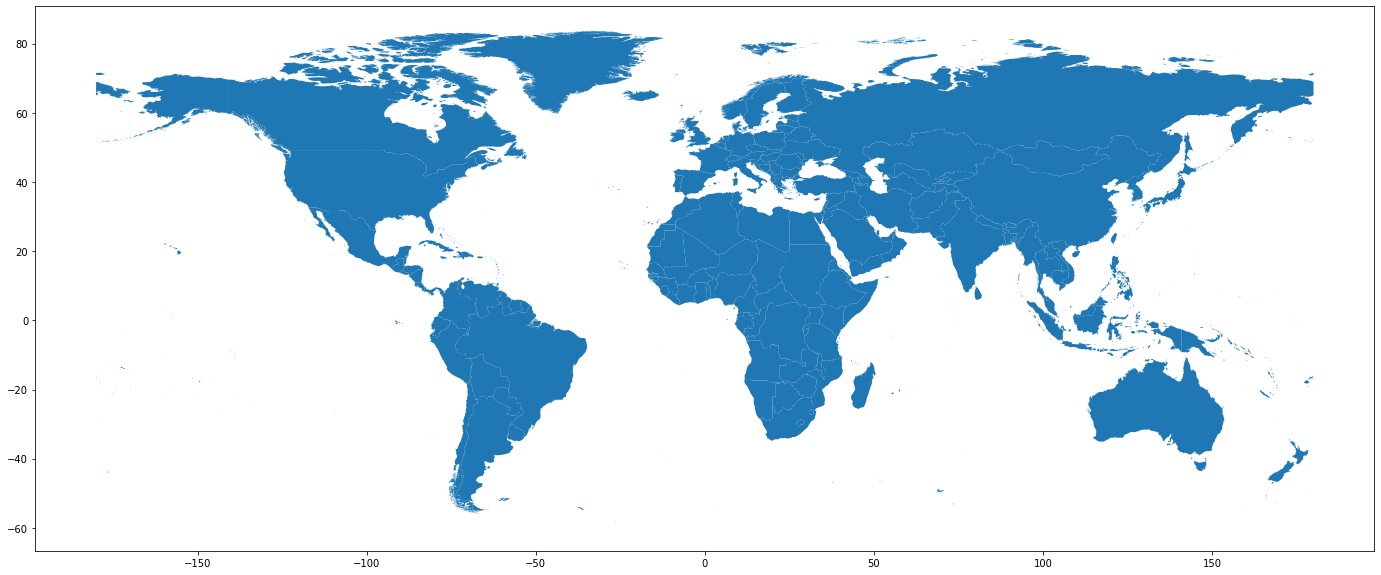

In [2]:
# take a look at the data
for data_cases in data:
    pass
#     print(data_cases)

# extract relevant columns of data we're interested in
data_cases = data_cases[['Country,Other', 'TotalCases' ]]

# use geopandas to read a shapefile
world_data = gpd.read_file(r'/home/jd/AAPG-Examples/gis-examples/covid-worldwide/World_Map.shp')

# display that shapefile
world_data.plot(figsize=(24, 18))

## Clean Up Data

In [3]:
# iterate over the data to find if there are country names that don't match
for items in data_cases['Country,Other'].tolist():
    world_data_list = world_data['NAME'].tolist()
    if items in world_data_list:
        pass
    else:
        print(items, ' is not in the world_data list')

# manipulate the country names that don't match
world_data.replace('Korea, Republic of', 'S. Korea', inplace = True)
world_data.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world_data.replace('United States', 'USA', inplace = True)
world_data.replace('United Kingdom', 'U.K.', inplace = True)
world_data.replace('United Arab Emirates', 'U.A.E.', inplace = True)
world_data.replace('Viet Nam', 'Vietnam', inplace = True)
world_data.replace('Macau', 'Macao', inplace = True)
world_data.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world_data.replace('Czech Republic', 'Czechia', inplace = True)
world_data.replace('Czech Republic', 'Czechia', inplace = True)
world_data.replace('Palestine', 'State of Palestine', inplace = True)

# rename column so there is a common column name between our 2 dataframes
data_cases.rename(columns = {'Country,Other': 'NAME'}, inplace = True)

# join on the common column name and save
combined = world_data.merge(data_cases, on = 'NAME')

combined.to_file(r'/home/jd/AAPG-Examples/gis-examples/covid-worldwide/combined.shp')

/home/jd/AAPG-Examples/gis-examples/covid-worldwide/env/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## New Shapefile

<AxesSubplot:>

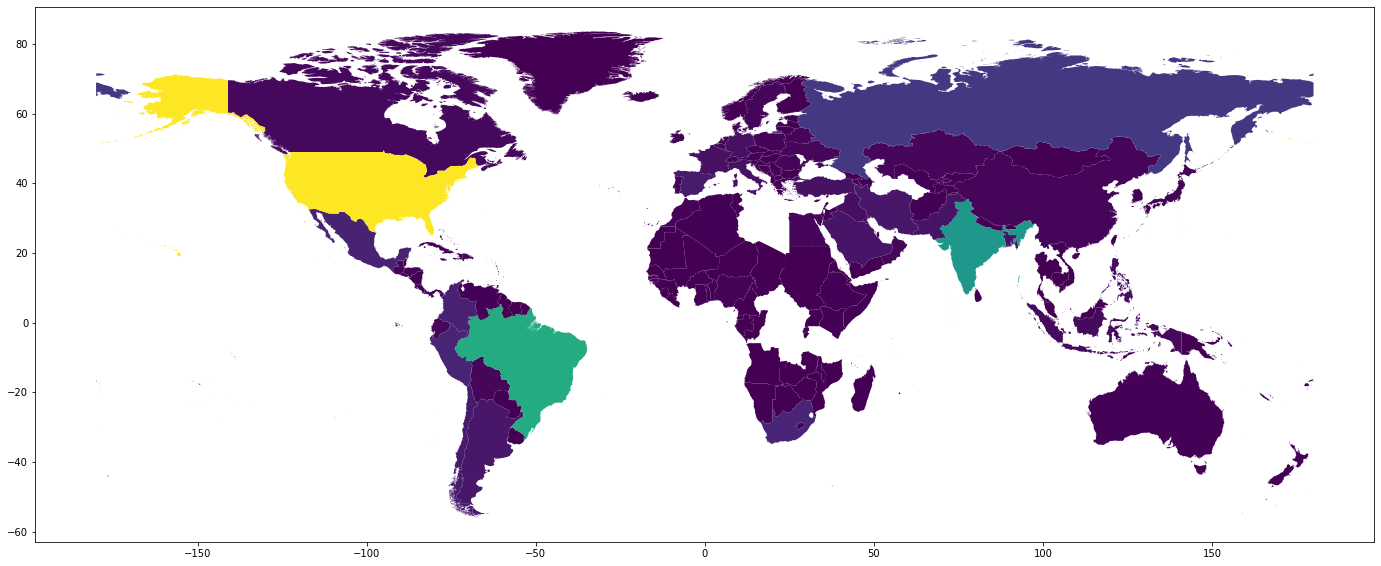

In [4]:
world_with_data = gpd.read_file(r'/home/jd/AAPG-Examples/gis-examples/covid-worldwide/combined.shp')

world_with_data.plot(column = "TotalCases", figsize=(24, 18))